In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
train = pd.read_parquet('train.parquet')

# Просматриваем первые несколько строк обучающей выборки
train.head()

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0


In [2]:
# смотрим основные статичтические значения
descriprion=train.describe()
descriprion

,id,label
count,80000.000000,80000.000000
mean,50107.893162,0.277250
std,28857.649778,0.447644
min,0.000000,0.000000
25%,25122.500000,0.000000
50%,50146.500000,0.000000
75%,75064.250000,1.000000
max,99999.000000,1.000000


In [3]:
train.info() # информация о типах признаков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      80000 non-null  int64  
 1   dates   80000 non-null  object 
 2   values  80000 non-null  object 
 3   label   80000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [8]:
# Проверка на пропуски
print('\nПроверка на пропущенные значения:')
print(train.isnull().sum())


Проверка на пропущенные значения:
id        0
dates     0
values    0
label     0
dtype: int64


In [10]:
# смотрим уникальные значения
print('\nУникальные значения:')
train['label'].value_counts()


Уникальные значения:


label
0.0    57820
1.0    22180
Name: count, dtype: int64

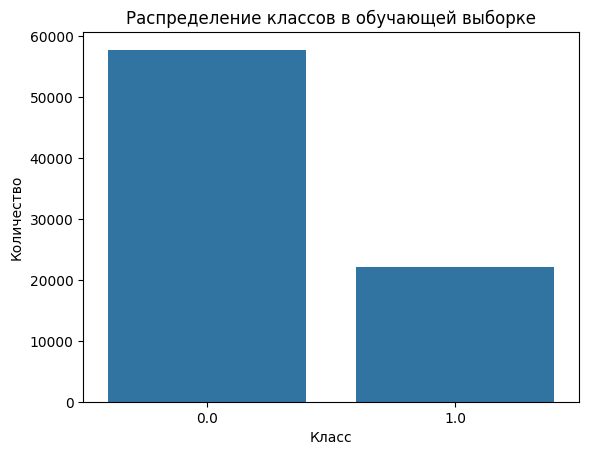

In [9]:
sns.countplot(x='label', data=train)
plt.title('Распределение классов в обучающей выборке')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()
plt.show()

In [14]:
# Пример временного ряда из обучающей выборки
sample_id = train['id'].iloc[0]
sample_dates = train[train['id'] == sample_id]['dates'].values[0]
sample_values = train[train['id'] == sample_id]['values'].values[0]
sample_dates

array([datetime.date(2016, 1, 1), datetime.date(2016, 2, 1),
       datetime.date(2016, 3, 1), datetime.date(2016, 4, 1),
       datetime.date(2016, 5, 1), datetime.date(2016, 6, 1),
       datetime.date(2016, 7, 1), datetime.date(2016, 8, 1),
       datetime.date(2016, 9, 1), datetime.date(2016, 10, 1),
       datetime.date(2016, 11, 1), datetime.date(2016, 12, 1),
       datetime.date(2017, 1, 1), datetime.date(2017, 2, 1),
       datetime.date(2017, 3, 1), datetime.date(2017, 4, 1),
       datetime.date(2017, 5, 1), datetime.date(2017, 6, 1),
       datetime.date(2017, 7, 1), datetime.date(2017, 8, 1),
       datetime.date(2017, 9, 1), datetime.date(2017, 10, 1),
       datetime.date(2017, 11, 1), datetime.date(2017, 12, 1),
       datetime.date(2018, 1, 1), datetime.date(2018, 2, 1),
       datetime.date(2018, 3, 1), datetime.date(2018, 4, 1),
       datetime.date(2018, 5, 1), datetime.date(2018, 6, 1),
       datetime.date(2018, 7, 1), datetime.date(2018, 8, 1),
       datetime.da

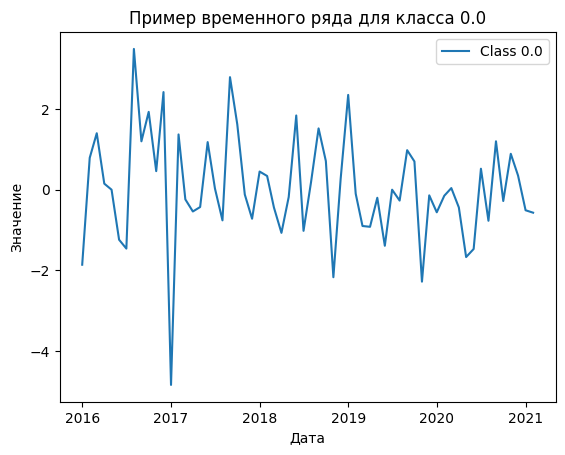

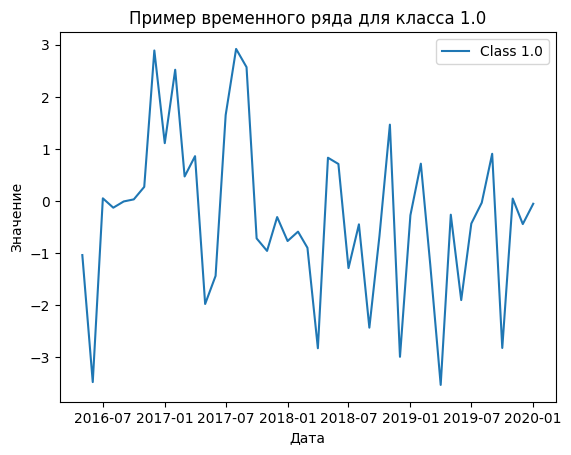

In [19]:
# Визуализация временных рядов для разных классов
for label in train['label'].unique():
    sample_series = train[train['label'] == label].iloc[0]
    plt.plot(sample_series['dates'], sample_series['values'], label=f'Class {label}')
    plt.title(f'Пример временного ряда для класса {label}')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.legend()
    plt.show()